# The Pi-Mu-e Expermiment

Nathaniel Flower, Liam Patterson

# Abstract

The pion decays into a muon and neutrino. The muon then decays into a positron and two neutrinos. The mass of the pion and muon was measured by measuring the length of the muon tracks and the radius of curvature of the positron tracks. After measuring the lengths and radius of several tracks and finding the averages, equations were formulated to find these masses. The mass of the muon was found to be 109.972 MeV/c^2 (actual = 106 MeV/c^2) with a 3.747% error and the mass of the pion was found to be 141.922 MeV/c^2 (actual = 140 MeV/c^2) with a 1.3737% error.

# Introduction

When high energy particles from the sun enter the atmosphere they collide with the nuclei of air molecules, which then produce many particles including the pion. The pions will spontaneously decay into a muon and a neutrino. the muon will decay as well into a positron and two neutrinos afterwards. With the right equipment, one can see the paths of the these particles. For this experiment, the particles will be going through a B-field in liquid hydrogen. The pion will have a curved path then if it suddenly goes into a short straight path then at the beginning of this new path, the pion decayed into the muon. After the short path, if the path goes back into a curved state then at the beginning of this new path, the muon decayed into the positron. By measuring the length of the muon and the radius of the positron, one can figure out the mass of the both the muon and the pion.

Pion Decay
\begin{equation}
\pi^+ \rightarrow \mu^+ + \nu
\end{equation}

Muon Decay
\begin{equation}
\mu^+ \rightarrow e^+ + \nu + \nu'
\end{equation}

# Methods

<p>For our experiment, we used the photos of data taken from the pion decay experiment. We separated the photos amongst all groups to measure the lengths of the muon and the radii of the positrons. We used rulers to measure the lengths in cm and a special paper designed for measuring radii in cm. After everyone was finished, we combined all of the data. The average length of the muon and radius of the positron was found with the combined data. Along with this data, we had our own experimental data being processed. This second set of data was to be graphed.</p>

# Data and Calculations

Solving for mass of the muon:
\begin{equation}
p_\perp = mv = eRB
\end{equation}

\begin{equation}
p_e = \frac{p_\perp}{sin\theta} = \frac{eRB}{sin\theta} = \frac{eRB}{.785}
\end{equation}

\begin{equation}
E_\mu = m_\mu c^2 = E_e+E_\nu+E_\nu ' \approx c(p_e + p_\nu + p_\nu')
\end{equation}

\begin{equation}
cp_e \approx cp_\nu \approx cp_\nu' \approx \frac{m_\mu c^2}{3}
\end{equation}

\begin{equation}
m_\mu \approx \frac{3eRB}{.785c}
\end{equation}
<br>
Equation for the kinetic energy:
<br>

\begin{equation}
T = \sqrt{2.1m_\mu c^2pL}
\end{equation}

<br>
Solving for the mass of the pion:
<br>
\begin{equation}
(p_\mu c)^2 = T^2 + 2Tm_\mu c^2
\end{equation}

\begin{equation}
m_\pi c^2= E_\mu+E_\nu
\end{equation}

\begin{equation}
m_\pi c^2 = \sqrt{(p_\mu c)^2 + (m_\mu c^2)^2} + p_\mu c
\end{equation}

In [1]:
import math
import astropy.units as u
from astropy.io import ascii
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

global C
global B
global RHO
global E

E = 3e-4
RHO = 0.07
B = 8800
C = 1 

MASS_MUON = 106
MASS_PION = 140


def massMuon(radius):
    '''
    Calculates mass of the muon in MeV/c^2
    :param radius float:Radius of curvature in cm
    '''
    global C
    global B
    global E
    return (3*E*B*radius)/.785
    

def kineticEnergyMuon(radius, length):
    '''
    Calculates the kinetic energy of the Muon in MeV
    :param radius float:Radius of curvature in cm
    :param length float:Length of path in cm
    '''
    global RHO
    global C
    return math.sqrt(2.1*massMuon(radius)*(C**2)*RHO*length)
    

def massPion(radius,length):
    '''
    Calculate the mass of the pion in MeV/c^2
    :param radius float:Radius of curvature in cm
    :param length float:Length of path in cm
    '''
    global C
    return (math.sqrt(kineticEnergyMuon(radius, length)**2 + 2*kineticEnergyMuon(radius, length)*massMuon(radius)*(C**2) 
                     + (massMuon(radius)*(C**2))**2) + math.sqrt(kineticEnergyMuon(radius, length)**2 + 
                     2*kineticEnergyMuon(radius, length)*massMuon(radius)*(C**2)))/(C**2)

In [2]:
fle = ascii.read('data.csv')

avg_radius = fle['radius'].mean()
avg_length = (fle['length'].mean())*.785

p_error_muon = ((massMuon(avg_radius)-MASS_MUON)/MASS_MUON)*100
p_error_pion = ((massPion(avg_radius, avg_length)-MASS_PION)/MASS_PION)*100

print("Average Radius:", avg_radius, "cm")
print("Average Length:", avg_length, "cm\n")

print("Calculated Mass of Muon: {0:.3f} MeV/c^2".format(massMuon(avg_radius)))
print("Accepted Mass of Muon:", MASS_MUON, "MeV/c^2")
print("Percent Error for Muon: {0:.3f}%\n".format(p_error_muon))

print("Calculated Mass of Pion: {0:.3f} MeV/c^2".format(massPion(avg_radius, avg_length)))
print("Accepted Mass of Pion:", MASS_PION, "MeV/c^2")
print("Percent Error for Pion: {0:.3f}%".format(p_error_pion))

Average Radius: 10.9 cm
Average Length: 0.800102329545 cm

Calculated Mass of Muon: 109.972 MeV/c^2
Accepted Mass of Muon: 106 MeV/c^2
Percent Error for Muon: 3.747%

Calculated Mass of Pion: 141.922 MeV/c^2
Accepted Mass of Pion: 140 MeV/c^2
Percent Error for Pion: 1.373%


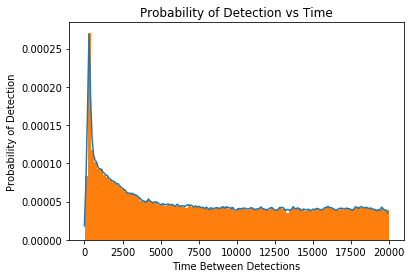

In [3]:
data = ascii.read('exp_data.csv', 'r')['delta_t']

fit = KernelDensity(kernel='exponential', bandwidth=60).fit(data[:, np.newaxis])
x_axis = np.array(range(0, 20000, 100))
pdf = fit.score_samples(x_axis[:, np.newaxis])
real = np.array([math.e**p for p in pdf])

plt.plot(x_axis, real)
plt.hist(data, bins=100, normed=True, histtype='stepfilled')
plt.title("Probability of Detection vs Time")
plt.xlabel("Time Between Detections")
plt.ylabel("Probability of Detection")
plt.show()

# Results and Conclusion

We measured the mass of a pion and muon as well as the the time between muon detections at the surface of the earth. After symbolically solving the equations for the masses, we calculated the mass of the pion to be 141.922 MeV/c^2 with 1.373% error and the mass of the muon to be 109.972 MeV/c^2 with 3.747% error. Kernel density estimation techniques can't be easily interpreted as a best fit line equation so its hard to say how close our results are to the actual values in the second experiment. However, from the trend line we can tell that muon detection is an exponential decay. Although we could have introduced uncertainty in the way we took our measurements in the first experiment, it is hard to quantify because of how many people took data. Thankfully, we would expect the uncertainty to cancel out because of how many data points were taken.